# Imports

In [1]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt

# Functions

In [2]:
def generate_random_graph(n_nodes=10, edge_probability=0.3, seed=42):
    random.seed(seed)
    np.random.seed(seed)
    
    G = nx.DiGraph()
    G.add_nodes_from(range(n_nodes))
    
    for i in range(n_nodes):
        for j in range(n_nodes):
            if i != j and random.random() < edge_probability:
                G.add_edge(i, j)
    
    if G.number_of_edges() == 0:
        i, j = random.sample(range(n_nodes), 2)
        G.add_edge(i, j)
    
    return G
    
def build_transition_matrix(G, epsilon=0.85):
    n = G.number_of_nodes()
    nodes = sorted(list(G.nodes()))
    node_to_index = {node: i for i, node in enumerate(nodes)}
    
    L = np.zeros((n, n))
    
    for node in nodes:
        out_degree = G.out_degree(node)
        node_idx = node_to_index[node]
        
        if out_degree > 0:
            for successor in G.successors(node):
                succ_idx = node_to_index[successor]
                L[succ_idx, node_idx] = 1.0 / out_degree
        else:
            L[:, node_idx] = 1.0 / n
    
    E = np.ones((n, n)) / n
    L = epsilon * L + (1 - epsilon) * E
    
    return L, node_to_index

def pagerank(G, epsilon=0.85, max_iter=100, tol=1e-6):
    L, node_to_index = build_transition_matrix(G, epsilon)
    n = L.shape[0]
    pr = np.ones(n) / n
    
    for iteration in range(max_iter):
        pr_new = L @ pr
        
        diff = np.abs(pr_new - pr).sum()
        if diff < tol:
            print(f"Сходимость достигнута на итерации {iteration}")
            break
        
        pr = pr_new
    
    pr /= pr.sum()
    
    index_to_node = {i: node for node, i in node_to_index.items()}
    pr_scores = {index_to_node[i]: score for i, score in enumerate(pr)}
    
    return pr_scores, L
    
def print_graph_info(G, pr_scores):
    print(f"Количество узлов: {G.number_of_nodes()}")
    print(f"Количество ребер: {G.number_of_edges()}")
    
    print("PageRank значения:")
    for node, score in sorted(pr_scores.items(), key=lambda x: x[1], reverse=True):
        print(f"  Узел {node}: {score:.4f}")
        
def visualize_graph_and_pagerank(G, pr_scores, figsize=(15, 5)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Подготовка данных для визуализации
    nodes = list(G.nodes())
    pr_values = [pr_scores[node] for node in nodes]
    
    # 1. Визуализация графа с размерами узлов по PageRank
    pos = nx.spring_layout(G, seed=42)
    
    # Нормализуем размеры узлов для лучшей визуализации
    node_sizes = [3000 * value for value in pr_values]
    
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, 
                          node_color=pr_values, 
                          cmap='viridis', ax=ax1)
    nx.draw_networkx_edges(G, pos, ax=ax1, arrows=True, 
                          arrowsize=20, edge_color='gray')
    nx.draw_networkx_labels(G, pos, ax=ax1)
    
    ax1.set_title("Граф с PageRank (размер узла = PageRank)")
    ax1.axis('off')
    
    # 2. Столбчатая диаграмма PageRank
    sorted_nodes = sorted(pr_scores.items(), key=lambda x: x[1], reverse=True)
    nodes_sorted = [f"Узел {node}" for node, _ in sorted_nodes]
    values_sorted = [value for _, value in sorted_nodes]
    
    bars = ax2.bar(nodes_sorted, values_sorted, color='skyblue')
    ax2.set_title("PageRank значений по узлам")
    ax2.set_ylabel("PageRank")
    ax2.set_xlabel("Узлы")
    ax2.tick_params(axis='x', rotation=45)
    
    # Добавляем значения на столбцы
    for bar, value in zip(bars, values_sorted):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                f'{value:.3f}', ha='center', va='bottom', fontsize=9)

# Case

PageRank:
Сходимость достигнута на итерации 18
Количество узлов: 8
Количество ребер: 18
PageRank значения:
  Узел 2: 0.2548
  Узел 6: 0.1966
  Узел 3: 0.1857
  Узел 7: 0.1142
  Узел 4: 0.1103
  Узел 0: 0.0774
  Узел 1: 0.0305
  Узел 5: 0.0305


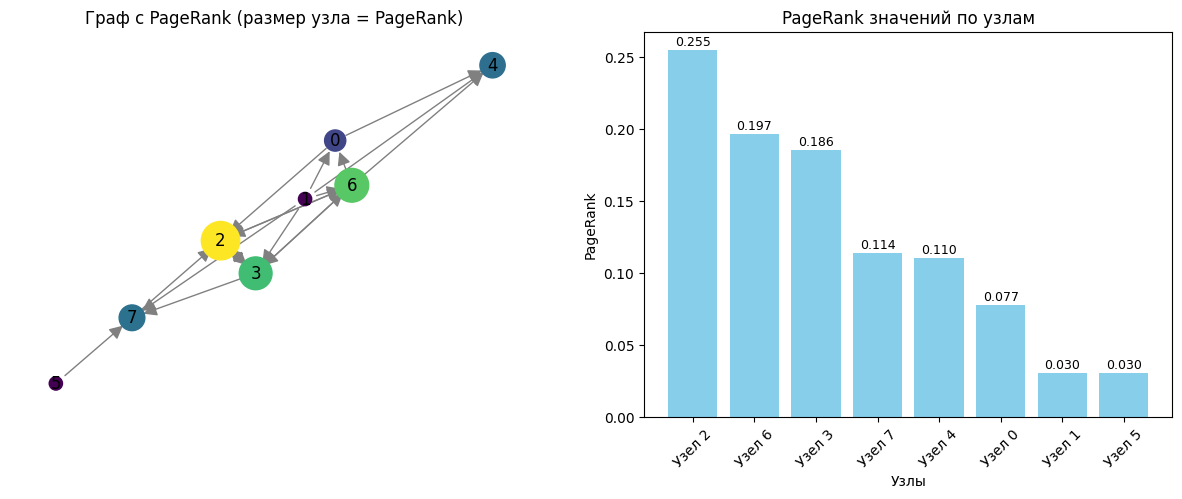

In [3]:
n = 8
egde_probability = 0.25

G = generate_random_graph(n_nodes=n, 
                             edge_probability=egde_probability, 
                             seed=42)
    
print("PageRank:")
pr_scores, L = pagerank(G, epsilon=0.85)
    
print_graph_info(G, pr_scores)
    
visualize_graph_and_pagerank(G, pr_scores)